In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import mysql.connector as mysql
import warnings
import contextlib


warnings.filterwarnings("ignore")


user = os.environ.get("USER")
password = os.environ.get("PASSWORD")
host = os.environ.get("HOST")
database = os.environ.get("DATABASE")

with open("../sql/analysis.sql", "r") as f:
    query = f.read()

with mysql.connect(user=user, password=password, host=host, database=database) as conn:

    data = pd.read_sql(query, conn)


data["data_rozpoczecia"] = pd.to_datetime(data["data_rozpoczecia"])

data["kwota_na_osobe_na_dzien"] = data["kwota"] / (
    data["ilosc_uczestnikow"] * data["ilosc_dni"]
)

sns.set_theme(style="darkgrid")
sns.set_palette("muted")


----
# **Pytanie:** 
#### Ile średnio kosztuje dzień wycieczki na osobę? Jak wygląda rozkład cen wycieczek na osobę?

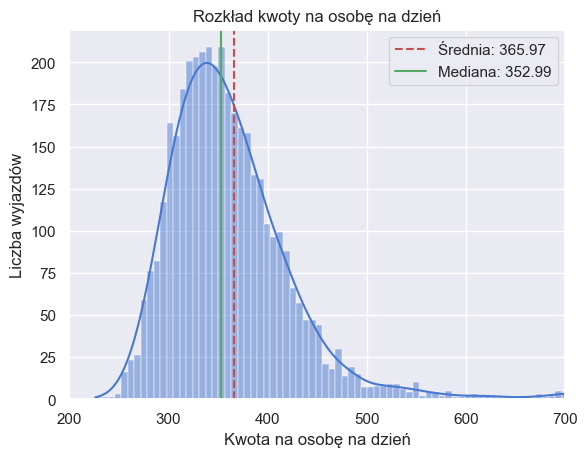

In [18]:
mean_kwota_na_osobe_na_dzien = data["kwota_na_osobe_na_dzien"].mean()
median_kwota_na_osobe_na_dzien = data["kwota_na_osobe_na_dzien"].median()

with contextlib.redirect_stdout(open(os.devnull, "w")):
    ax = sns.histplot(data=data, x="kwota_na_osobe_na_dzien", kde=True, bins=100)
    plt.xlim(200, 700)
    ax.axvline(
        mean_kwota_na_osobe_na_dzien,
        color="r",
        linestyle="--",
        label=f"Średnia: {mean_kwota_na_osobe_na_dzien:.2f}",
    )
    ax.axvline(
        median_kwota_na_osobe_na_dzien,
        color="g",
        linestyle="-",
        label=f"Mediana: {median_kwota_na_osobe_na_dzien:.2f}",
    )
    ax.set(xlabel="Kwota na osobę na dzień", ylabel="Liczba wyjazdów")
    ax.set_title("Rozkład kwoty na osobę na dzień")
    ax.legend()

# **Odpowiedź:** 
#### Wycieczki kosztują średnio około 370 zł dzień na osobę. Rozkład cen przypomina rozkład normalny, ale posiada długi ogon.

----
# **Pytanie:** 
#### Jaka jest przyczyna długiego ogona cen wycieczek?

In [19]:
data_oreded = data.sort_values(by="kwota_na_osobe_na_dzien", ascending=False)
data_oreded.head(10)

,id_wycieczki,ilosc_uczestnikow,kwota,ilosc_dni,miasto,kraj,tematyka,data_rozpoczecia,zysk,data_transakcji,kwota_na_osobe_na_dzien
3584,3708,5,4396.57,1,Neapol,Włochy,Skakanie w workach na głowie,2016-08-26,4705.97,2015-01-03,879.314000
2954,3621,6,5087.18,1,Zagrzeb,Chorwacja,Budowanie igloo z mydła w kostce,2019-04-05,5570.18,2017-07-16,847.863333
2647,365,5,4235.80,1,Zagrzeb,Chorwacja,Budowanie igloo z mydła w kostce,2020-07-12,4638.30,2018-11-26,847.160000
3506,2783,8,6548.68,1,Paryż,Francja,Skakanie w workach na głowie,2022-04-07,6765.88,2021-02-05,818.585000
2790,1816,4,3273.88,1,Neapol,Włochy,Budowanie igloo z mydła w kostce,2023-08-12,3619.96,2023-03-25,818.470000
2827,2237,5,4090.53,1,Neapol,Włochy,Budowanie igloo z mydła w kostce,2024-05-27,4523.13,2022-08-01,818.106000
3296,3878,4,3249.29,1,Kopenhaga,Dania,Festiwal naśladowania dźwięków tostera,2023-06-08,3560.85,2022-06-26,812.322500
3722,2578,1,802.78,1,Split,Chorwacja,Spacer z lodówką na smyczy,2019-08-02,872.69,2019-05-07,802.780000
3310,102,3,2388.12,1,Barcelona,Hiszpania,Skakanie w workach na głowie,2023-07-21,2520.69,2022-06-28,796.040000
1672,3338,3,2384.75,1,Neapol,Włochy,Zawody w tłumaczeniu języka pingwinów,2023-08-13,2717.36,2022-05-04,794.916667


# **Odpowiedź:**
#### Długi ogon cen wycieczek jest spowodowany jednodniowymi wycieczkami za granicę, gdzie cena dojazdu zawyża cenę wycieczki. 

----
# **Pytanie:**
#### Jak wygląda rozkład ilości uczestników wycieczek?

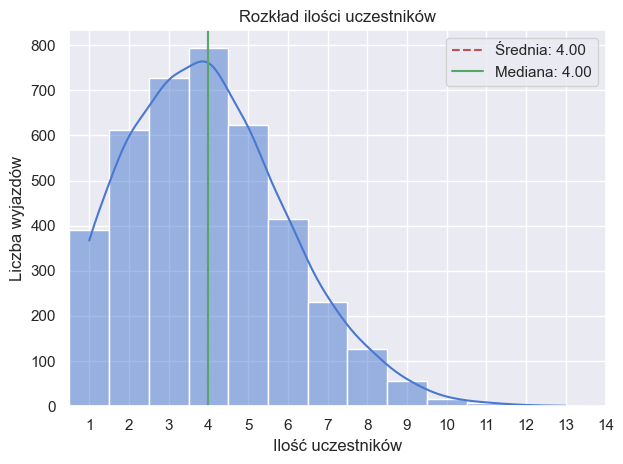

In [20]:
mean_ilosc_uczestnikow = data["ilosc_uczestnikow"].mean()
median_ilosc_uczestnikow = data["ilosc_uczestnikow"].median()

with contextlib.redirect_stdout(open(os.devnull, "w")):
    ax = sns.histplot(
        data=data,
        x="ilosc_uczestnikow",
        kde=True,
        discrete=True,
        kde_kws={"bw_adjust": 1.5},
        bins=len(data["ilosc_uczestnikow"].unique()),
    )
    ax.set_xlim(0.5, 14)
    plt.xticks(np.arange(1, 15, 1), labels=np.arange(1, 15, 1))
    ax.axvline(
        mean_ilosc_uczestnikow,
        color="r",
        linestyle="--",
        label=f"Średnia: {mean_ilosc_uczestnikow:.2f}",
    )
    ax.axvline(
        median_ilosc_uczestnikow,
        color="g",
        linestyle="-",
        label=f"Mediana: {median_ilosc_uczestnikow:.2f}",
    )
    ax.set(xlabel="Ilość uczestników", ylabel="Liczba wyjazdów")
    ax.set_title("Rozkład ilości uczestników")
    ax.legend()
    plt.tight_layout()

# **Odpowiedź:**
#### Rozkład ilości uczestników wycieczek przypomina rozkład poissona, z dużym prawdopodobieństwem wycieczek z ilością uczestników miedzy 2 i 5. Najczęściej wycieczki mają 3 uczestników, medniana i średnia wynoszą 4.

----
# **Pytanie:**
#### Gdzie najczęściej odbywają się wycieczki? Gdzie najrzadziej?

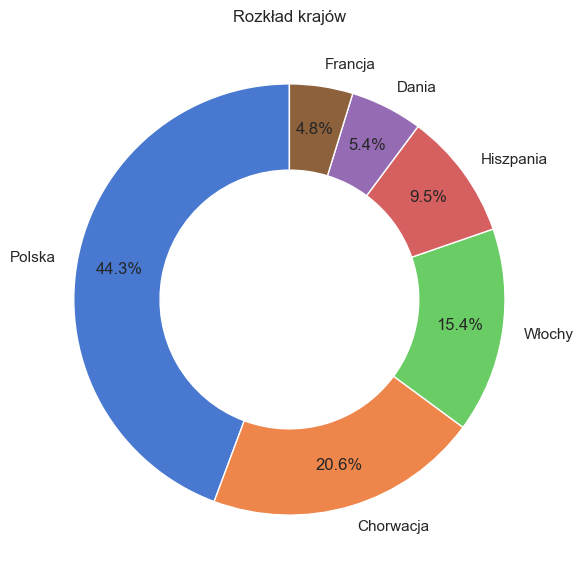

In [21]:
countries = data["kraj"].value_counts()

with contextlib.redirect_stdout(open(os.devnull, "w")):
    plt.figure(figsize=(7, 7))
    plt.pie(
        x=countries,
        labels=countries.index,
        autopct="%1.1f%%",
        startangle=90,
        wedgeprops={"width": 0.4},
        pctdistance=0.8,
    )
    plt.title("Rozkład krajów")

# **Odpowiedź:**
#### Najczęściej wycieczki odbywają się w Polsce, gdzie odbywa się ponad 40% wycieczek. Następnie w Chorwacji, tam odbywa się ok 20% wycieczek. Wycieczki do włoch zajmują 15% wszystkich wycieczek, do Hiszpanii 10%, a Danii i Francji po ok 5%.

---     
# **Pytanie:**
#### Po któych wycieczkach najczęściej wracają uczestnicy?


In [22]:
query = """
SELECT K.kraj, T2.nazwa as tematyka, AVG((
    SELECT COUNT(*)-1
    FROM  Wycieczki_Uczestnicy WU2
    WHERE U.id_uczestnika = WU2.id_uczestnika
    GROUP BY WU2.id_uczestnika))as powroty
FROM Wycieczki_Uczestnicy
    JOIN team20.Uczestnicy U on U.id_uczestnika = Wycieczki_Uczestnicy.id_uczestnika
    JOIN team20.Wycieczki W on W.id_wycieczki = Wycieczki_Uczestnicy.id_wycieczki
    JOIN team20.Kierunki K on K.id_kierunku = W.id_kierunku
    JOIN team20.Tematyki T2 on T2.id_tematyki = W.id_tematyki
GROUP BY
    K.kraj, T2.nazwa
ORDER BY powroty DESC
"""

with mysql.connect(user=user, password=password, host=host, database=database) as conn:
    
    returns = pd.read_sql(query, conn)

returns = returns.pivot(index="kraj", columns="tematyka", values="powroty")
returns

tematyka,Budowanie igloo z mydła w kostce,Festiwal naśladowania dźwięków tostera,Parkur po cudzych balkonach,Skakanie w workach na głowie,Składanie origami z tostów,Spacer z lodówką na smyczy,Sztafeta z kaktusem,Wyścig na zegarach ściennych,Zawody w liczeniu kropli deszczu,Zawody w tłumaczeniu języka pingwinów
kraj,,,,,,,,,,
Chorwacja,4.2080,3.9789,4.0236,4.0486,4.0220,3.9693,3.8338,4.0054,4.0233,4.0315
Dania,4.0122,4.1392,4.0364,4.0690,3.7500,3.5556,3.8333,3.9259,3.8689,3.6116
Francja,4.4810,3.6667,4.0648,3.8101,3.5814,3.0000,3.8444,4.1408,4.0109,3.3200
Hiszpania,3.8750,4.1802,3.9731,3.9259,3.8154,3.8039,3.8867,3.9833,3.9295,3.9179
Polska,4.0730,4.0228,4.0184,3.8679,4.0587,3.8473,4.1055,3.9825,4.0089,4.0688
Włochy,4.0517,3.9651,3.9130,3.7619,4.2406,4.3256,4.1869,3.9173,3.8807,3.8857


# **Odpowiedź:**
#### Nasi klienci sąwierni i wracają często niezależnie od wycieczki. Najczęściej wracają z wycieczek do Francji na budowanie iglo z mydła w kostce, a najrzadziej z Francji na spacer z lodówką na smyczy, ale warto dodać, że obie wartości są wyskoie, więc usuwanie którejkolwiek z wycieczek z oferty jest niezalecane.

----
# **Pytanie:**
#### Jakie są nasze najlepiej sprzedające się tematyki wycieczek? Czy kraj ma wpływ na tematykę wycieczki?

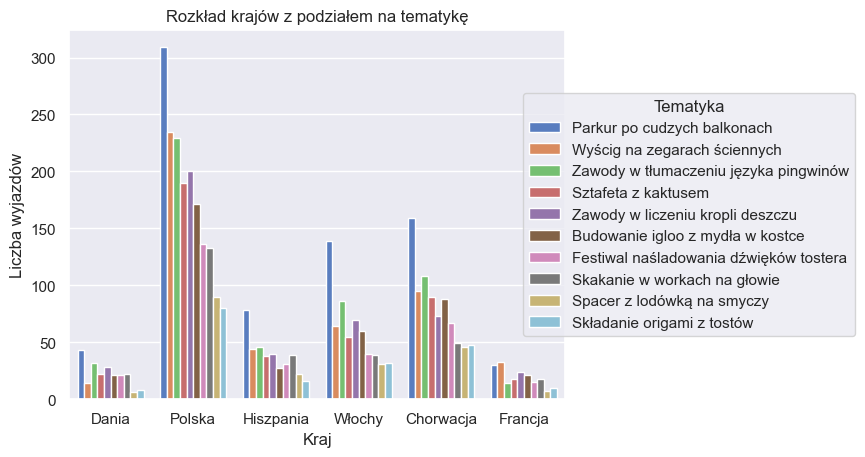

In [23]:
with contextlib.redirect_stdout(open(os.devnull, "w")):
    ax = sns.countplot(x="kraj", data=data, hue="tematyka")

    ax.legend(title="Tematyka", loc="center right", bbox_to_anchor=(1.6, 0.5))
    ax.set(xlabel="Kraj", ylabel="Liczba wyjazdów")
    ax.set_title("Rozkład krajów z podziałem na tematykę")

# **Odpowiedź:**
#### Najlepiej sprzedająca się tematyka wycieczek to 'Parkur po cudzych balkonach', kiedy najgorzej sprzedają się tematyki wycieczek to 'Spacer z lodówką na smyczy'. Kraj nie ma znacznego wpływu na tematykę wycieczki.


---
# **Pytanie:**
#### Czy nasze najlepiej sprzedające się wycieczki są opłacalne? Czy powinniśmy zwiększyć cenę?

In [24]:
query="""SELECT
    K.kraj,
    T2.nazwa as tematyka,
    (T.kwota - (T2.koszt * DATEDIFF(W.data_zakonczenia, W.data_rozpoczecia) + K.koszt)
        * W.ilosc_uczestnikow)
        /W.ilosc_uczestnikow
        /DATEDIFF(W.data_zakonczenia, W.data_rozpoczecia) AS profit_na_os_na_dzien
FROM Wycieczki W
    JOIN Tematyki T2 ON W.id_tematyki = T2.id_tematyki
    JOIN Kierunki K ON W.id_kierunku = K.id_kierunku
    JOIN Transakcje T ON W.id_wycieczki = T.id_wycieczki
WHERE T2.nazwa = 'Parkur po cudzych balkonach'
AND K.kraj = 'Polska'"""

with mysql.connect(user=user, password=password, host=host, database=database) as conn:
    
    profit = pd.read_sql(query, conn)

profit["profit_na_os_na_dzien"].describe()

count    309.000000
mean     112.019792
std       19.846463
min       63.384792
25%       98.584242
50%      111.081944
75%      123.320417
max      172.440000
Name: profit_na_os_na_dzien, dtype: float64

# **Odpowiedź:**
#### Nasze najlepiej sprzedające się wycieczki są opłacalne, ale nie ma potrzeby zwiększania ceny.

----
# **Pytanie:**
#### Jak zmienia się ilość kupowanych wycieczek w zależności od miesiąca? 

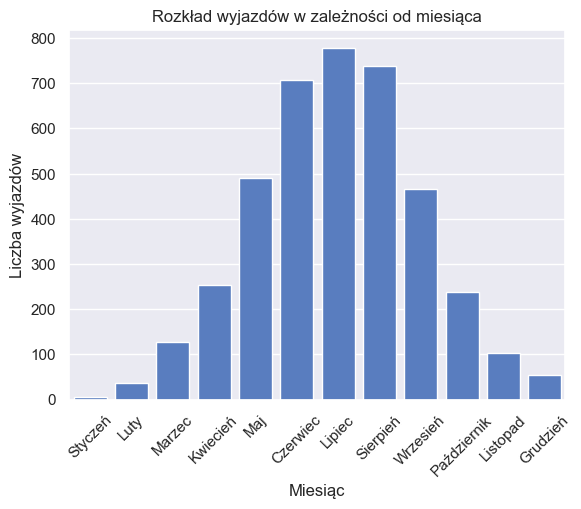

In [25]:
months_dict = {
    1: "Styczeń",
    2: "Luty",
    3: "Marzec",
    4: "Kwiecień",
    5: "Maj",
    6: "Czerwiec",
    7: "Lipiec",
    8: "Sierpień",
    9: "Wrzesień",
    10: "Październik",
    11: "Listopad",
    12: "Grudzień",
}
data["miesiac_rozpoczecia"] = data["data_rozpoczecia"].dt.month
data["miesiac_rozpoczecia"] = data["miesiac_rozpoczecia"].map(months_dict)
data["rok_rozpoczecia"] = data["data_rozpoczecia"].dt.year

with contextlib.redirect_stdout(open(os.devnull, "w")):

    ax = sns.countplot(data=data, x="miesiac_rozpoczecia", order=months_dict.values())
    ax.set(xlabel="Miesiąc", ylabel="Liczba wyjazdów")
    ax.set_title("Rozkład wyjazdów w zależności od miesiąca")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# **Odpowiedź:**
#### Najwięcej wycieczek kupowanych jest w czerwcu, a najmniej w styczniu. W okresie letnim sprzedaż wycieczek jest wyższa niż w okresie zimowym. Rozkład sprzedaży wycieczek w zależności od miesiąca przypomina rozkład normalny ze średnią na lipcu.

----
# **Pytanie:**
#### Jak zmienia się ilość kupowanych wycieczek w na przestrzeni lat? Czy jest tendencja wzrostowa?

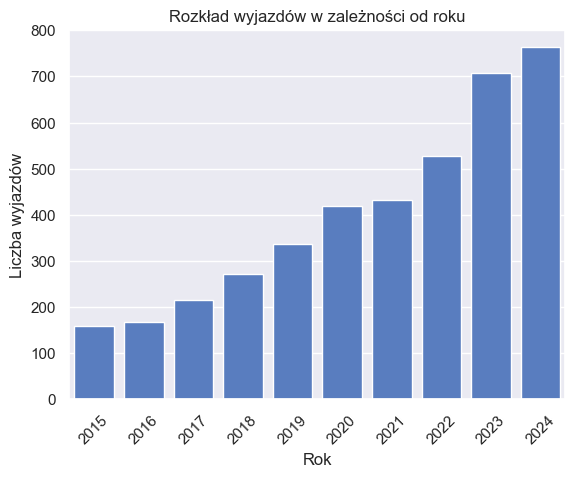

In [26]:
with contextlib.redirect_stdout(open(os.devnull, "w")):

    ax = sns.countplot(data=data, x="rok_rozpoczecia")
    ax.set(xlabel="Rok", ylabel="Liczba wyjazdów")
    ax.set_title("Rozkład wyjazdów w zależności od roku")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# **Odpowiedź:**
#### Na przestrzeni lat ilość kupowanych wycieczek wzrasta wykładniczo. W roku 2024 sprzedano podna 5 razy więcej wycieczek niż w roku 2015.

----
# **Pytanie:**
#### Jak wygląda rozkład ilości sprzedanych wycieczek na przedziale całej działalności firmy? Jakich trendów można się spodziewać w przyszłości?

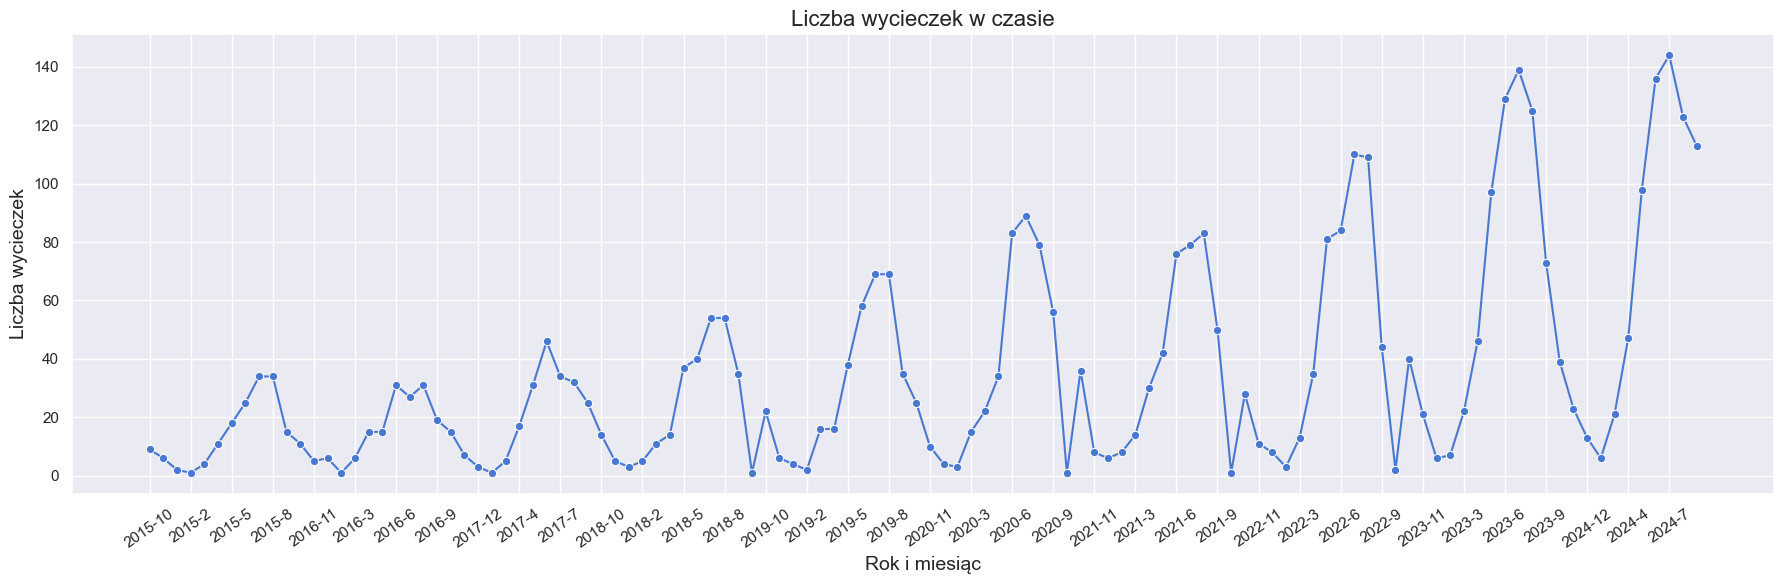

In [27]:
reversed_months_dict = {v: k for k, v in months_dict.items()}


plt.figure(figsize=(18, 6))
data["rok_i_miesiac"] = (
    data["rok_rozpoczecia"].astype(str)
    + "-"
    + data["miesiac_rozpoczecia"].map(reversed_months_dict).astype(str)
)

monthly_trips = data.groupby("rok_i_miesiac").size().reset_index(name="ilosc_wyjazdow")

sns.lineplot(
    data=monthly_trips,
    x="rok_i_miesiac",
    y="ilosc_wyjazdow",
    marker="o",
)

plt.title("Liczba wycieczek w czasie", fontsize=16)
plt.xlabel("Rok i miesiąc", fontsize=14)
plt.ylabel("Liczba wycieczek", fontsize=14)
plt.xticks(
    ticks=np.arange(0, len(monthly_trips), 3),
    labels=monthly_trips["rok_i_miesiac"][::3],
    rotation=35,
)
plt.tight_layout()
plt.show()

# **Odpowiedź:**
#### Rozkład ilości sprzedanych wycieczek na przedziale całej działalności firmy przypomina wzrost wykładniczy z oscylacjami w zależności od miesiąca. W przyszłości można się kontynuacji trendu.

---
# **Pytanie:**
#### Jak wierni są nasi klienci? Czy są klienci, którzy kupują wycieczki regularnie?

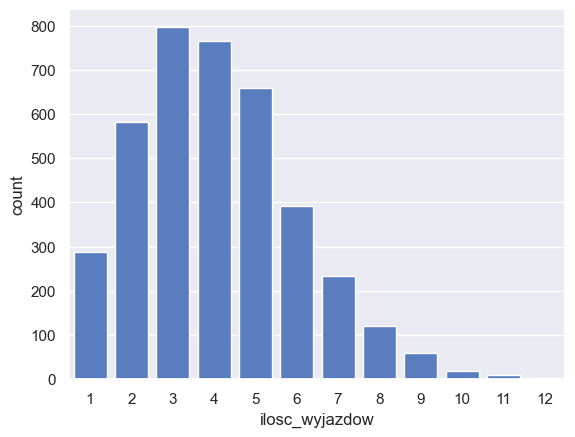

In [28]:
query = """
SELECT
    count(*) as ilosc_wyjazdow,
    id_uczestnika
FROM 
    Wycieczki_Uczestnicy
GROUP BY
    id_uczestnika
"""

with mysql.connect(user=user, password=password, host=host, database=database) as conn:
    customer_loyalty = pd.read_sql(query, conn)
mean_ilosc_wyjazdow = customer_loyalty["ilosc_wyjazdow"].mean()
median_ilosc_wyjazdow = customer_loyalty["ilosc_wyjazdow"].median()

with contextlib.redirect_stdout(open(os.devnull, "w")):
    sns.countplot(data=customer_loyalty, x="ilosc_wyjazdow")
    ax.legend()

# **Odpowiedź:**
#### Większość klientów kupuje wiecej niż jedną wycieczkę. Najwiecej kupuję 3 bądź 4 wycieczki. Istnieją klienci, którzy kupują wycieczki regularnie.

In [29]:
with open("../sql/employee.sql", "r") as f:
    employee_query = f.read()


with mysql.connect(user=user, password=password, host=host, database=database) as conn:

    employee_data = pd.read_sql(employee_query, conn)

---
# **Pytanie:**
#### Jak wygląda rozkład płac naszych pracowników?

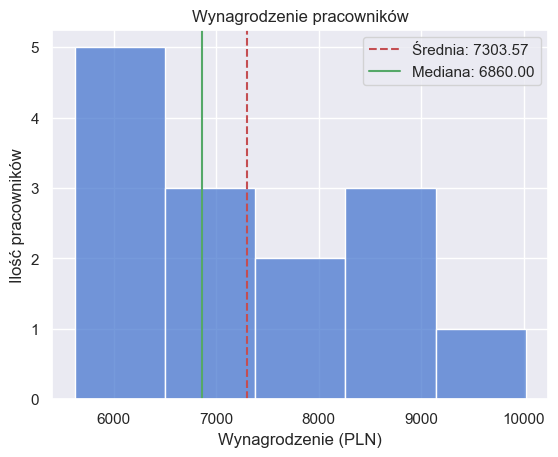

In [30]:
mean_wynagrodzenie = employee_data["wynagrodzenie"].mean()
median_wynagrodzenie = employee_data["wynagrodzenie"].median()

with contextlib.redirect_stdout(open(os.devnull, "w")):

    ax = sns.histplot(data=employee_data, x="wynagrodzenie", bins=5)
    ax.axvline(
        mean_wynagrodzenie,
        color="r",
        linestyle="--",
        label=f"Średnia: {mean_wynagrodzenie:.2f}",
    )
    ax.axvline(
        median_wynagrodzenie,
        color="g",
        linestyle="-",
        label=f"Mediana: {median_wynagrodzenie:.2f}",
    )
    ax.set(xlabel="Wynagrodzenie (PLN)", ylabel="Ilość pracowników")
    ax.set_title("Wynagrodzenie pracowników")
    ax.legend()

# **Odpowiedź:**
#### Najwiecej naszych pracowników zarabia około 6000zł, z mediana na 6860 zł, a średnią na 7300 zł. Wyższa średnia od mediany wskazuje na to, że mamy kilku pracowników zarabiających znacznie więcej niż reszta. Jest to zarząd firmy oraz nasz analityk danych.

---
# **Pytanie**:
#### Czy firma zyskuje na sprzedaży wycieczek wystarczająco aby prosperować?

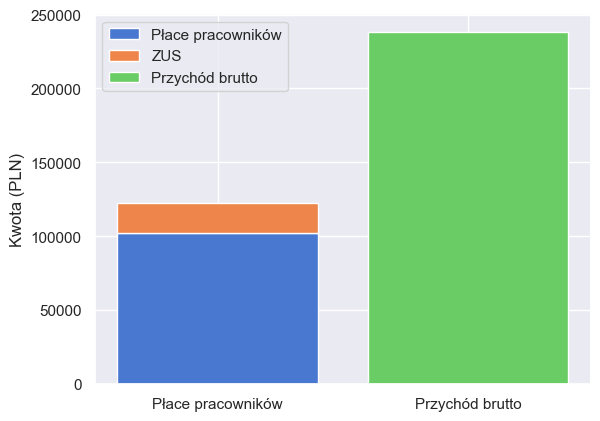

In [31]:
data_mounth_ago = data[(pd.to_datetime(data["data_transakcji"]) > pd.Timestamp('2023-06-01')) &
                       (pd.to_datetime(data["data_transakcji"]) < pd.Timestamp('2023-07-01'))]

total_pay_per_month = employee_data["wynagrodzenie"].sum()
ZUS_per_month = total_pay_per_month * 0.195
total_revenue_per_month = data_mounth_ago["zysk"].sum()

with contextlib.redirect_stdout(open(os.devnull, "w")):
    fig, ax = plt.subplots()
    ax.bar('Płace pracowników', total_pay_per_month, label='Płace pracowników')
    ax.bar('Płace pracowników', ZUS_per_month, bottom=total_pay_per_month, label='ZUS')

    ax.set(ylabel="Kwota (PLN)")
    ax.bar('Przychód brutto', total_revenue_per_month, label='Przychód brutto')
    ax.legend()

    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Płace pracowników', 'Przychód brutto'])


---
# **Odpowiedź**:
#### Firma zyskuje na sprzedaży wycieczek wystarczająco aby prosperować.

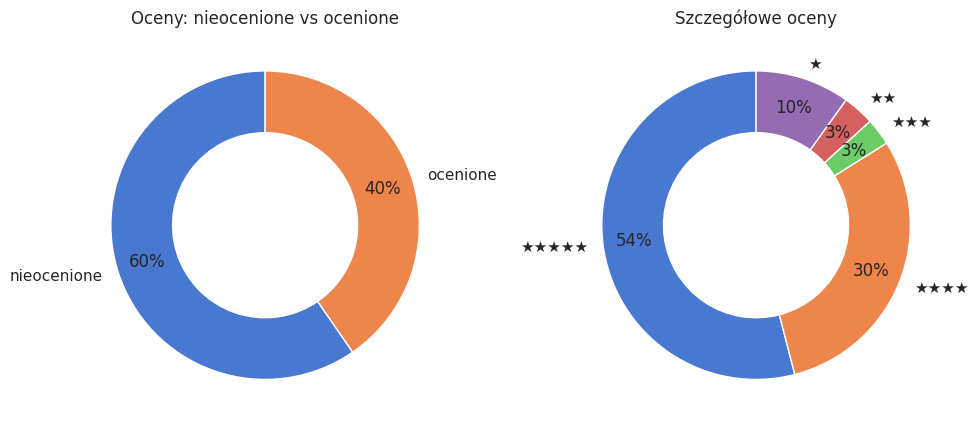

In [32]:
from matplotlib import rcParams
rcParams['font.family'] = 'DejaVu Sans'

query = """
SELECT
    ocena
FROM Wycieczki_Uczestnicy
"""

with mysql.connect(user=user, password=password, host=host, database=database) as conn:
    ratings = pd.read_sql(query, conn)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ratings_not_null = ratings.dropna()
ratings_summary = pd.Series({
    'nieocenione': ratings['ocena'].isna().sum(),
    'ocenione': ratings_not_null.shape[0]
})

with contextlib.redirect_stdout(open(os.devnull, "w")):
    axs[0].pie(
        x=ratings_summary,
        labels=ratings_summary.index,
        autopct="%1.f%%",
        startangle=90,
        wedgeprops={"width": 0.4},
        pctdistance=0.8,
    )
    axs[0].set_title("Oceny: nieocenione vs ocenione")

stars = {5: '★★★★★', 4: '★★★★', 3: '★★★', 2: '★★', 1: '★'}
ratings_not_null['stars'] = ratings_not_null['ocena'].apply(stars.get)
ratings_ordered = ratings_not_null["stars"].value_counts().reindex(['★★★★★', '★★★★', '★★★', '★★', '★'])

with contextlib.redirect_stdout(open(os.devnull, "w")):
    axs[1].pie(
        x=ratings_ordered,
        labels=ratings_ordered.index,
        autopct="%1.f%%",
        startangle=90,
        wedgeprops={"width": 0.4},
        pctdistance=0.8
    )
    axs[1].set_title("Szczegółowe oceny")

plt.tight_layout()
plt.show()



# **Odpowiedź:**
#### 40% osób ocenia wycieczki. Dominują oceny 5/5 i 4/5, ale występują również oceny 1/5, inne oceny występują rzadko.